# Módulo  `IPython.display`

El módulo [`IPython.display`](https://ipython.readthedocs.io/en/stable/api/generated/IPython.display.html) está instalado por defecto con el kernel de IPython

La función principal de este módulo es

```python
display(*objs, # Una tupla de objetos de Python
        ...)
```
Esta función al igual que `print`, imprime el valor de los objetos de Python

Sin embargo, `display` no está limitado a mostrar strings, como veremos en este apartado

## Diferencia entre `print` y `display`

La forma en que se imprime un objeto con `print` o `display` está dado por los métodos [`__str__`](https://docs.python.org/3/reference/datamodel.html#object.__str__) y [`__repr__`](https://docs.python.org/3/reference/datamodel.html#object.__repr__) de dicho objeto, respectivamente

Los objetos nativos de `Python` (por ejemplo las listas) ya tienen estos métodos definidos

Observe las diferencias entre `print` y `display` para las siguientes clases

In [1]:
class Fruta:
    def __init__(self, color, nombre):
        self.color = color
        self.nombre = nombre
        
foo = Fruta('rojo', 'manzana')

In [2]:
print(foo)

In [3]:
display(foo)

`display` no imprime `__str__`:

In [4]:
class Fruta_str(Fruta): # Esta clase hereda de Fruta        
    def __str__(self): # y le agrega este atributo
        return f'Soy una {self.nombre} de color {self.color}'
    
foo = Fruta_str('rojo', 'manzana')

In [5]:
print(foo)

Soy una manzana de color rojo


In [6]:
display(foo)

- `print` imprime `__repr__` si no encuentra `__str__`
- `display` imprime `__repr__` 

In [7]:
class Fruta_repr(Fruta): # Esta clase hereda de Fruta        
    def __repr__(self): # y le agrega este atributo
        return f'Soy una {self.nombre} de color {self.color}'
    
foo = Fruta_repr('rojo', 'manzana')

In [8]:
print(foo) 

Soy una manzana de color rojo


In [9]:
display(foo) 

Soy una manzana de color rojo

Adicionalmente display acepta el método `_repr_html_` que permite imprimir con formato HTML

`print` ignora este método

In [10]:
class Fruta_repr_nice(Fruta): # Esta clase hereda de Fruta        
    def _repr_html_(self): # y le agrega este atributo
        return f'<p style="color:blue">Soy una {self.nombre} de color {self.color}</p>'
    
foo = Fruta_repr_nice('rojo', 'manzana')

In [11]:
print(foo)

In [12]:
display(foo)

## Imprimiendo imágenes con el objeto `Image`

Usando `Image` podemos mostrar una imagen en formato JPG, PNG o GIF que esté en nuestro disco duro o una URL 

Para mostrar una imagen llamada `mi_imagen.jpg` en nuestro directorio local 

```python
from IPython.display import Image
display(Image(filename="mi_imagen.jpg"))
```

Se debe especificar al menos uno de los siguientes argumentos

```python
Image(data, # Tira binaria que representa una imagen, requiere especificar format (abajo)
      url, # dirección web a un archivo en una página web
      filename, # dirección local a un archivo en nuestro disco duro
      ...
     )
```

Los siguientes argumentos son opcionales

```python
Image(...
      format, # String, formato de la imagen, solo necesario para la entrada data
      embed, # Bool, indica si el archivo se guardará en la metadata del notebook
      width, # Entero, ancho del cuadro a mostrar, por defecto se usa el tamaño real de la imagen
      height, # Entero, alto del cuadro a mostrar
      ...
     )
```

**Ejemplo**

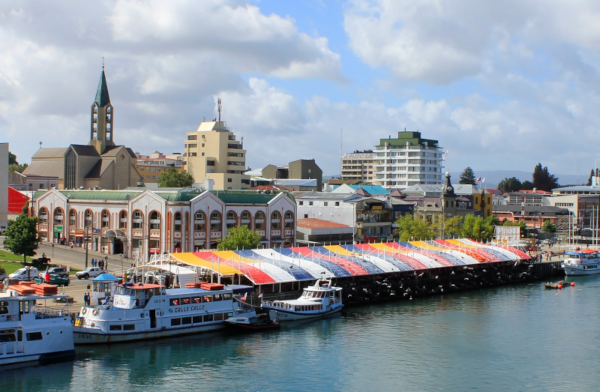

In [13]:
from IPython.display import Image
display(Image('img/valdivia.png'))

:::{note}

También se puede mostrar una imagen con `matplotlib` importándola con `imread` y dibujándola con `imshow`. Si sólo nos interesa mostrar la imagen y no vamos a ocupar su data entonces `Image` es más conveniente

:::

## Reproducción de sonido con el objeto `Audio`


Este objeto crea un reproductor de sonido con controles play/pause a partir de un archivo de audio, una URL o un arreglo de datos, por ejemplo

```python
from IPython.display import Audio
display(Audio(filename="mi_audio.ogg"))
```

Se debe especificar al menos uno de los siguientes argumentos

```python
Audio(data, # Lista o ndarray que se interpreterá como audio crudo de uno (mono) o dos canales (stereo)
      url, # dirección web a un archivo en una página web
      filename, # dirección local a un archivo en nuestro disco duro
      ...
     )
```

El tipo de archivo soportado depende del browser (wav y ogg funcionan por defecto)

Los siguientes argumentos son opcionales

```python
Audio(...
      embed, # Bool, indica si el archivo se guardará en la metadata del notebook
      rate, # Entero, especifica la frecuencia de muestreo si usamos data (nota abajo)
      autoplay, # Bool, indica si el sonido debe empezar a reproducirse inmediatamente
      normalize, # Bool, indica si se debe reescalar el sonido entre [-1,1]
      ...
     )
```


**Ejemplo**

Crearemos un tono fundamental en 440 Hz, es decir la nota A4 (La) utilizando NumPy y lo reproducimos utilizando Audio

In [14]:
from IPython.display import Audio
import numpy as np
Fs = 48000
time = np.arange(0, 2, step=1./Fs) # 2 segundos de audio
data = 0.1*np.cos(2.0*np.pi*time*440)
display(Audio(data, rate=Fs, normalize=False))

:::{note}

Para poder interpretar el arreglo como un audio es suficiente especificar la frecuencia de muestreo, por ejemplo 44100 o 48000Hz y asegurar que los valores del arreglo son flotantes en el range [-1, 1]

:::

## Reproducción de video con el objeto  `Video`

Crea un reproductor con los mismos controles del objeto `Audio` para un archivo de video

El archivo puede estar en nuestro disco duro en una URL

Se usa de forma equivalente a `Image` (mismos argumentos)

Adicionalmente existen los objetos `YouTubeVideo` y `VimeoVideo` para embeber videos de estas plataformas

**Ejemplo:**

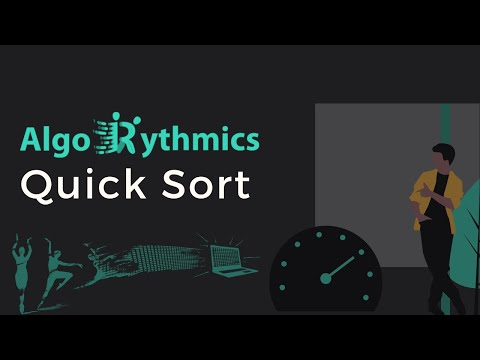

In [15]:
from IPython.display import YouTubeVideo
display(YouTubeVideo("ywWBy6J5gz8"))

##  Código fuente formateado con el objeto `Code`

Este objeto imprime código fuente con colores la sintáxis, sus argumentos son

```python
Code(data=None, # Un string con código fuente
     url=None,  # Una URL a un archivo de código fuente en un servidor
     filename=None, # Un archivo de código fuente en nuestro disco duro
     language=None # Para especificar el lenguaje que se usará para resaltar color
    )
```


**Ejemplo**

In [16]:
from IPython.display import Code
display(Code("script_interesante.py"))

def funcion_interesante(n):
    """
    Este script es interesante
    """
    if n == 1:
        return 1

    else:
        return n * funcion_interesante(n-1)

if __name__ == '__main__':
    print(funcion_interesante(10))

## Mostrando Objeto `HTML`

Muestra una página web o un fragmento de página web escrito en HTML

```python
HTML(data=None, # String, texto plano en lenguaje HTML
     url=None, # Una URL a un archivo HTML
     filename=None, # Una ruta a un archivo HTML en nuestro sistema
     ...
    )
```



**Ejemplo**

In [17]:
from IPython.display import HTML

codigo_html = '<p style="font-size:20pt;color:blue;">Pablo Huijse\n</p>'
display(HTML(codigo_html))

**Breve nota sobre HTML**

HyperText Markup Language (HTML) es un lenguaje de marcado (markup) para diseñar documentos que serán mostrados por un navegador (browser). HTML en conjunto a Cascading Style Sheets (CSS) y a JavaScript son los ingredientes fundamentals de una página web

HTML permite crear documentos estructurados con encabezados, párrafos, enlaces, imágenes, audio y video. Cada uno de estos elementos se escribe con uno o dos **tags**, por ejemplo

```HTML
<h1> Esto es un encabezado</h1>
<p style="color:red;text-align:center"> Esto es un parrafo centrado y de color rojo</p>
<img src="mi_imagen.jpg">
```